In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('duk_merge.csv')
# Inspect the data

df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler
 
# Create the scaled training data set
train_data_date = data_date[0:int(training_data_date), :]

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.8928294 , 0.8928294 , 0.89795971, 0.90195009, 0.9022354 ,
       0.90537073, 0.90594047, 0.91050104, 0.91449142, 0.91107121,
       0.90822075, 0.90822075, 0.90708083, 0.90366063, 0.89910007,
       0.90081017, 0.89852989, 0.89624961, 0.89197435, 0.88952315,
       0.88541881, 0.88997894, 0.89151247, 0.89339958, 0.89339958,
       0.89217398, 0.89311427, 0.89510968, 0.89795971, 0.89567943,
       0.8945395 , 0.89852989, 0.89852989, 0.90708083, 0.90594047,
       0.90822075, 0.90822075, 0.90651065, 0.91449142, 0.9133515 ,
       0.9167717 , 0.91734188, 0.91563178, 0.91449142, 0.91676605,
       0.91449142, 0.91734188, 0.91962216, 0.9201919 , 0.92104739,
       0.91563178, 0.92190244, 0.92589282, 0.92475247, 0.92133226,
       0.92304236, 0.92304236, 0.92703275, 0.92475247, 0.92760293])]
[0.9287428488421146]

[array([0.8928294 , 0.8928294 , 0.89795971, 0.90195009, 0.9022354 ,
       0.90537073, 0.90594047, 0.91050104, 0.91449142, 0.91107121,
       0.90822075, 0.90822075, 0.907

In [3]:
#cnn

Epoch 1/100
413/413 [==============================] - 6s 7ms/step - loss: 0.0035
Epoch 2/100
413/413 [==============================] - 3s 8ms/step - loss: 2.2567e-04
Epoch 3/100
413/413 [==============================] - 5s 11ms/step - loss: 1.6940e-04
Epoch 4/100
413/413 [==============================] - 6s 16ms/step - loss: 1.7071e-04
Epoch 5/100
413/413 [==============================] - 2s 6ms/step - loss: 1.5918e-04
Epoch 6/100
413/413 [==============================] - 3s 7ms/step - loss: 2.0081e-04
Epoch 7/100
413/413 [==============================] - 9s 21ms/step - loss: 1.1891e-04
Epoch 8/100
413/413 [==============================] - 3s 8ms/step - loss: 1.4667e-04
Epoch 9/100
413/413 [==============================] - 4s 9ms/step - loss: 1.2391e-04
Epoch 10/100
413/413 [==============================] - 3s 8ms/step - loss: 1.3204e-04
Epoch 11/100
413/413 [==============================] - 12s 28ms/step - loss: 1.2491e-04
Epoch 12/100
413/413 [=============================

413/413 [==============================] - 10s 23ms/step - loss: 6.3971e-05
Epoch 95/100
413/413 [==============================] - 5s 13ms/step - loss: 6.6781e-05
Epoch 96/100
413/413 [==============================] - 6s 15ms/step - loss: 6.4415e-05
Epoch 97/100
413/413 [==============================] - 8s 20ms/step - loss: 6.4103e-05
Epoch 98/100
413/413 [==============================] - 3s 7ms/step - loss: 6.4744e-05
Epoch 99/100
413/413 [==============================] - 9s 22ms/step - loss: 7.7508e-05
Epoch 100/100
413/413 [==============================] - 5s 12ms/step - loss: 6.4054e-05


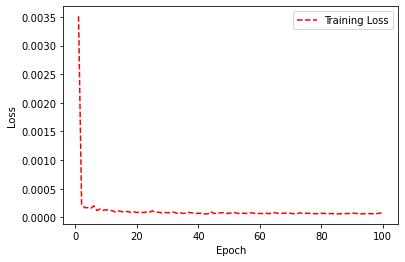

In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt

model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# Train the model
history = model2.fit(x_train, y_train, batch_size=16, epochs=100)

# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [6]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)

# Get the root mean squared error (RMSE)
rmse_2 = np.sqrt(np.mean(((predictions2 - y_test) ** 2)))
rmse_2

0.1762931520565807

In [7]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_2 = data[training_data_len:]
valid_2['Predictions2'] = predictions2

mape(valid_2['Close'], valid_2['Predictions2'])

<ipython-input-7-9a69333f9fd3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions2'] = predictions2


0.15578992647060314

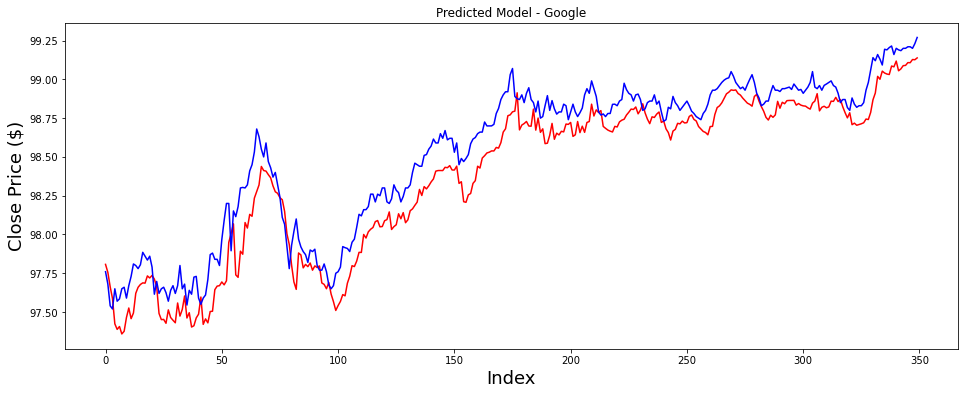

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Predicted Model - Google')
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
#plt.plot(train['Close'], 'b-', label = 'train')
plt.plot(predictions2,'r-', label = 'predict')
plt.plot(y_test,'b-', label = 'actual')
#plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()